# This is a tutorial to show how to extract small patches from a 3-D image

Sometimes we need to process large 3-D images using deep learning. Feeding such sizes to a deep neural network may be not possible for a couple of reasons: 1. This will require huge amount of memory; 2. This will gravely slow down the neural network. As an alternative, we deconstruct those large images into smaller patches and train the network with them. In this notebook, I will show how to deconstruct a 3-D CT-scan into 32x32x32 patches. Also, I will show how to integrate the patches to get back the original 3-D image.     

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
Vol0=np.load("Volume0.npy")

In [8]:
I,J,K=Vol0.shape
print I,J,K

360 360 308


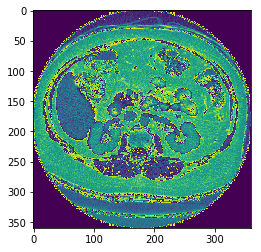

In [9]:
Vol1=[]
for k in range(0,K,32):
    for i in range(0,I,32):
        for j in range(0,J,32):
            Vol1.append(Vol0[i:i+32,j:j+32,k:k+32])
%matplotlib inline
plt.imshow(Vol0[:,:,1])

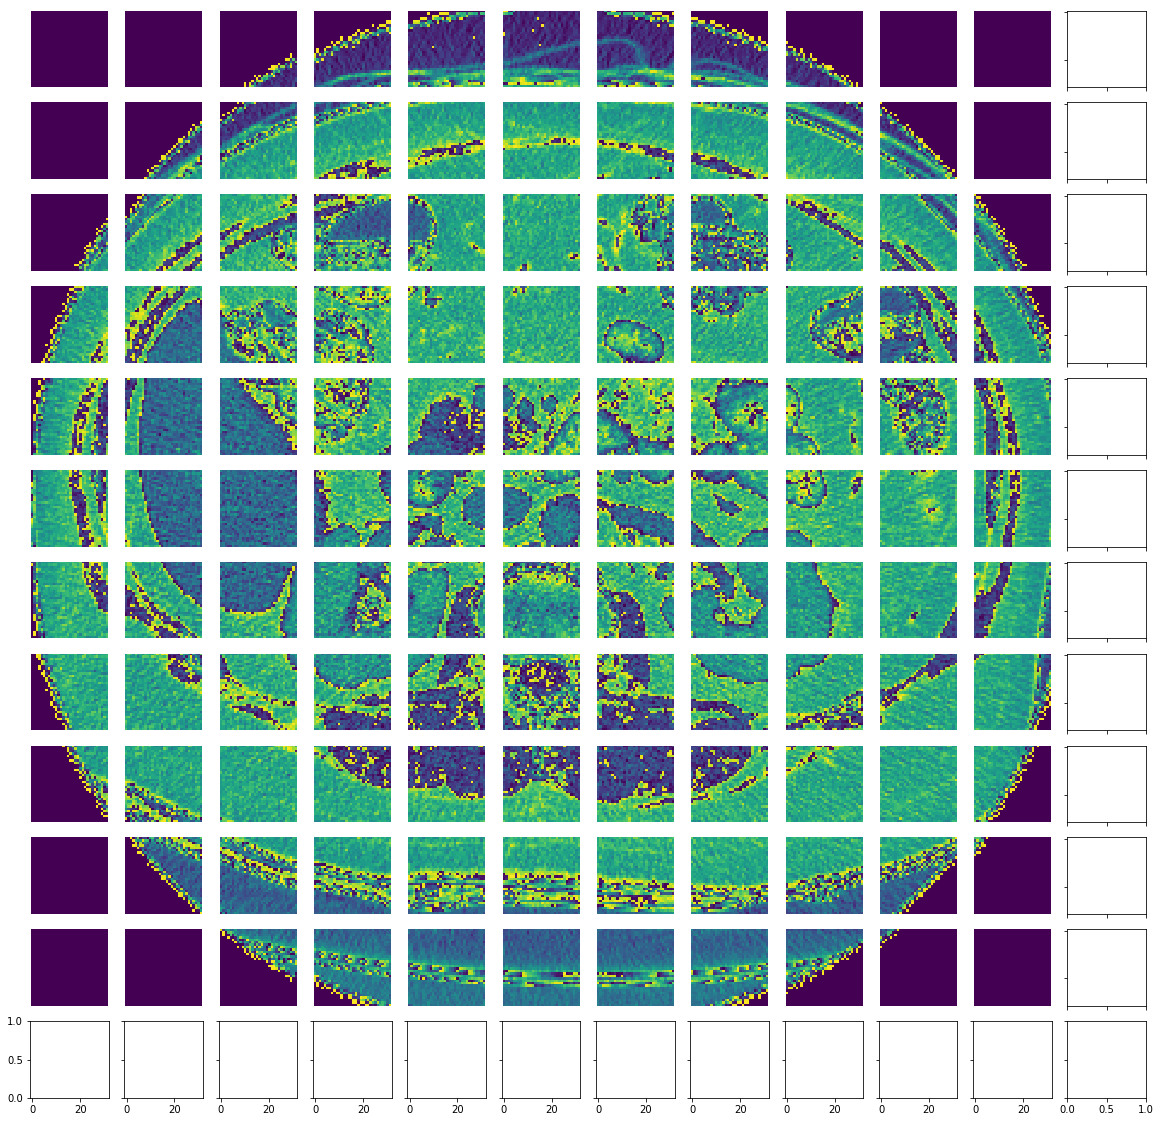

In [10]:
img=Vol1 #nxyz
f, plots = plt.subplots(12, 12, sharex='col', sharey='row', figsize=(20, 20))
for i in range(12*12):
    num=i
    if np.array(img[num]).shape ==(32,32,32):
        plots[i // 12, i % 12].axis('off')
        plots[i // 12, i % 12].imshow(img[num][:,:,0],interpolation='none',vmin=Vol0[num].min(),vmax=Vol0[num].max())
#check visualize-Copy4working+model-Copy3.ipynb

In [11]:
A=np.zeros((Vol0.shape))

m=0
for k in range(0,K,32):
    for i in range(0,I,32):
        for j in range(0,J,32):
            x,y,z=np.array(Vol1[m]).shape
            A[i:i+x,j:j+y,k:k+z]=Vol1[m]
            m=m+1

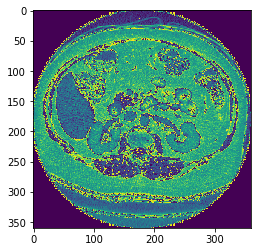

In [12]:
plt.imshow(A[:,:,0])